In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py
import py21cmfast as p21c

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [7]:
ddir = "/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-fine/log10m13.200"

fn_bkg = f"{ddir}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
fn_m1 = f"{ddir}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"

with h5py.File(fn_bkg, 'r') as hf:
    lcfield_bkg = hf['lightcones']['brightness_temp'][()]
with h5py.File(fn_m1, 'r') as hf:
    lcfield_m1 = hf['lightcones']['brightness_temp'][()]

lc_bkg = p21c.LightCone.read(fn_bkg)
z_s = lc_bkg.lightcone_redshifts

In [5]:
EoR_color_small = mpl.colors.LinearSegmentedColormap.from_list('EoRsmall', [
    (0.0, 'black'),
    (0.6, 'blue'),
    (1.0, 'cyan')
])

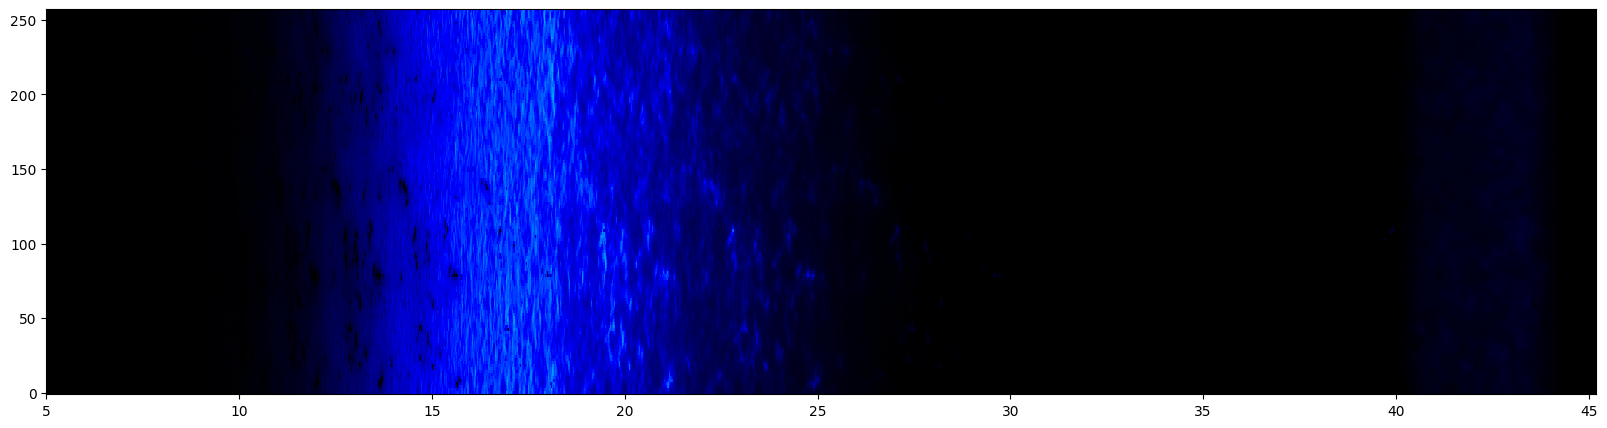

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))

x_s = np.linspace(0, 256, 128)
axs.pcolormesh(z_s, x_s, (lcfield_m1 - lcfield_bkg)[:,64,:], cmap=EoR_color_small, vmin=0, vmax=.01)

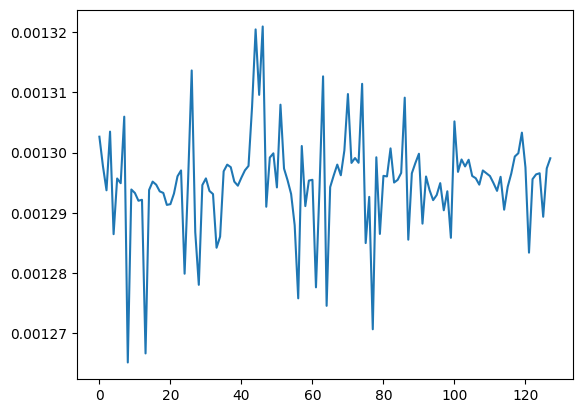

In [29]:
plt.plot(np.mean(lcfield_m1 - lcfield_bkg, axis=(1,2)))

In [ ]:
fig, axs = plt.subplots(10, 1, figsize=(20, 40))

for i in range(10):
    axs[i].imshow((lcfield_m1 - lcfield_bkg)[10*i], cmap='binary', vmin=0, vmax=.01);

In [34]:
with h5py.File(fn_bkg, 'r') as hf:
    Tk_bkg = hf['lightcones']['Tk_box'][()]
with h5py.File(fn_m1, 'r') as hf:
    Tk_m1 = hf['lightcones']['Tk_box'][()]

plt.plot(z_s, np.mean(Tk_bkg - Tk_m1, axis=(0,1)))

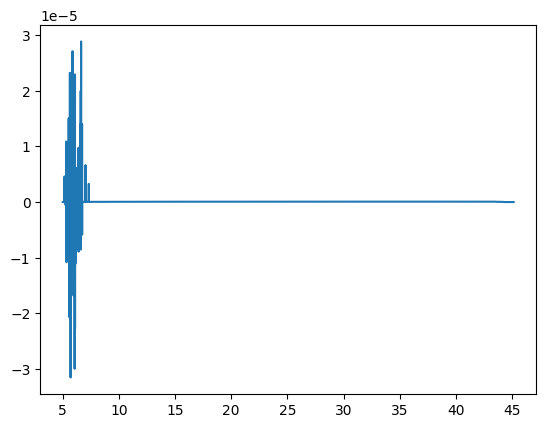

In [41]:
with h5py.File(fn_bkg, 'r') as hf:
    xH_bkg = hf['lightcones']['xH_box'][()]
with h5py.File(fn_m1, 'r') as hf:
    xH_m1 = hf['lightcones']['xH_box'][()]

plt.plot(z_s, np.mean(xH_bkg - xH_m1, axis=(0,1)))